In [15]:
import shutil

# 압축 해제할 파일 경로
compressed_file = 'Images.zip'

# 압축을 푼 후 저장할 디렉터리 경로

# ZIP 파일 해제
shutil.unpack_archive(compressed_file, '')

In [16]:
# 압축 해제할 파일 경로
compressed_file = 'Airplanes_Annotations.zip'

# 압축을 푼 후 저장할 디렉터리 경로

# ZIP 파일 해제
shutil.unpack_archive(compressed_file, '')

In [17]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [18]:
path = "Images"
annot = "Airplanes_Annotations"

airplane_321.jpg


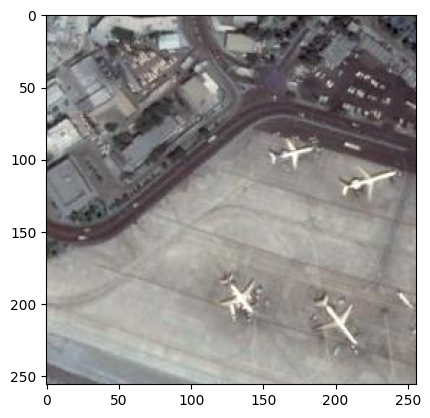

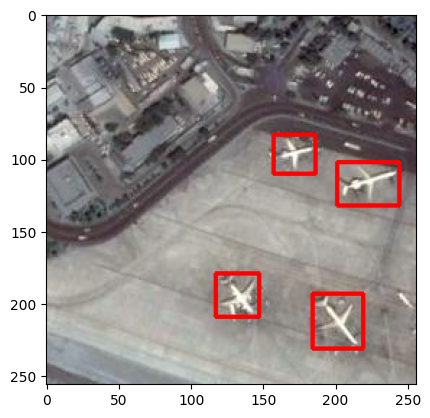

In [19]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [20]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

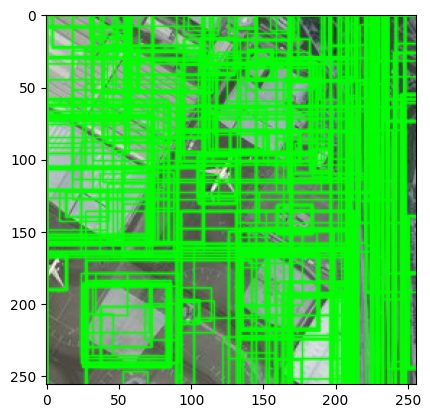

In [21]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [22]:
train_images=[]
train_labels=[]

In [23]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [24]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [25]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_321.jpg
1 airplane_450.jpg
2 airplane_545.jpg
3 airplane_282.jpg
4 airplane_269.jpg
5 airplane_665.jpg
6 airplane_054.jpg
7 airplane_313.jpg
8 airplane_395.jpg
9 airplane_059.jpg
10 airplane_109.jpg
11 airplane_674.jpg
12 airplane_600.jpg
13 airplane_230.jpg
14 airplane_696.jpg
15 airplane_105.jpg
16 airplane_244.jpg
17 airplane_626.jpg
18 airplane_435.jpg
19 airplane_668.jpg
20 airplane_695.jpg
21 airplane_124.jpg
22 airplane_287.jpg
23 airplane_421.jpg
24 airplane_694.jpg
25 airplane_058.jpg
26 airplane_001.jpg
inside
27 airplane_019.jpg
28 airplane_657.jpg
29 airplane_188.jpg
30 airplane_514.jpg
32 airplane_595.jpg
33 airplane_486.jpg
34 airplane_164.jpg
35 airplane_026.jpg
36 airplane_652.jpg
37 airplane_643.jpg
38 airplane_022.jpg
39 airplane_593.jpg
inside
40 airplane_499.jpg
41 airplane_574.jpg
42 airplane_444.jpg
43 airplane_259.jpg
44 airplane_599.jpg
45 airplane_038.jpg
46 airplane_575.jpg
47 airplane_200.jpg
48 airplane_371.jpg
49 airplane_114.jpg
50 airplane_155.

inside
402 airplane_559.jpg
403 airplane_152.jpg
404 airplane_448.jpg
405 airplane_043.jpg
406 airplane_541.jpg
407 airplane_437.jpg
408 airplane_410.jpg
409 airplane_263.jpg
410 airplane_032.jpg
411 airplane_337.jpg
412 airplane_465.jpg
413 airplane_436.jpg
414 airplane_095.jpg
415 airplane_316.jpg
416 airplane_091.jpg
417 airplane_181.jpg
418 airplane_205.jpg
419 airplane_520.jpg
420 airplane_360.jpg
421 airplane_299.jpg
422 airplane_256.jpg
423 airplane_607.jpg
424 airplane_572.jpg
425 airplane_158.jpg
426 airplane_492.jpg
427 airplane_461.jpg
428 airplane_154.jpg
429 airplane_579.jpg
430 airplane_434.jpg
inside
431 airplane_065.jpg
432 airplane_622.jpg
433 airplane_025.jpg
434 airplane_641.jpg
435 airplane_215.jpg
436 airplane_554.jpg
437 airplane_549.jpg
438 airplane_649.jpg
439 airplane_585.jpg
440 airplane_175.jpg
441 airplane_213.jpg
inside
443 airplane_297.jpg
inside
444 airplane_078.jpg
445 airplane_662.jpg
446 airplane_569.jpg
447 airplane_044.jpg
448 airplane_592.jpg
449 ai

In [26]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [27]:
X_new.shape

(30229, 224, 224, 3)

In [28]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [29]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [31]:
X= vggmodel.layers[-2].output

In [32]:
predictions = Dense(2, activation="softmax")(X)

In [43]:
import os
import shutil

# cudnn 파일 압축 해제
cudnn_archive = 'cudnn-linux-x86_64-8.9.4.25_cuda12-archive.tar.xz'
extracted_dir = 'cudnn-extracted'  # 압축 해제된 디렉토리 경로 설정
os.system(f'tar -xJvf {cudnn_archive} -C {extracted_dir}')

# 필요한 파일을 복사
cuda_include_dir = 'cuda/include'
cuda_lib64_dir = 'cuda/lib64'
cuda_version = '11.0'  # 여기에 본인 시스템의 CUDA 버전을 입력하세요.

# 디렉토리가 존재하지 않으면 생성
os.makedirs(f'/usr/local/cuda-{cuda_version}/include', exist_ok=True)
os.makedirs(f'/usr/local/cuda-{cuda_version}/lib64', exist_ok=True)

# 파일을 복사
shutil.copy(os.path.join(extracted_dir, cuda_include_dir, 'cudnn*.h'), f'/usr/local/cuda-{cuda_version}/include/')
shutil.copy(os.path.join(extracted_dir, cuda_lib64_dir, 'libcudnn*'), f'/usr/local/cuda-{cuda_version}/lib64/')

# 환경 변수 설정
os.environ['PATH'] = f'/usr/local/cuda-{cuda_version}/bin:{os.environ["PATH"]}'
os.environ['LD_LIBRARY_PATH'] = f'/usr/local/cuda-{cuda_version}/lib64:{os.environ.get("LD_LIBRARY_PATH", "")}'

print("cuDNN 설치 및 환경 변수 설정이 완료되었습니다.")


tar (child): cudnn-linux-x86_64-8.9.4.25_cuda12-archive.tar.xz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


PermissionError: [Errno 13] Permission denied: '/usr/local/cuda-11.0'

In [44]:
model_final = Model(input = vggmodel.input, output = predictions) # Cudnn 버전 충돌 엔비디아 사이트에서 재설치, 경로지정, 권한없음

TypeError: ('Keyword argument not understood:', 'input')

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [ ]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

In [ ]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)